# Implementation of Epilson-Greedy Algorithm for MAB prblems

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import sys

In [52]:
class Environment:
    def __init__(self, n_arms) :
        self.q_star = np.random.normal(0,1,n_arms)
        self.optimal_arm = np.argmax(self.q_star)
    
    def give_reward(self, action) :
        return 1 if (np.random.random()  < self.q_star[action]) else 0
    
    def check_optimal(self, action) :
        return 1 if (action == self.optimal_arm) else 0

In [53]:
class Agent:
    def __init__(self, n_arms, e) :
        self.arms = n_arms
        self.e = e #epilson
        self.n = np.zeros((n_arms,1), dtype=int)#count for no of times each action is pulled
        self.q = np.zeros((n_arms,1), dtype=float)#estimated reward for each action
    
    def take_action(self) :
        if(np.random.random() < self.e): #explore
            return np.random.randint(0, self.arms)
        else:
            return np.argmax(self.q)
        
    def update_rule(self, action, reward) :
        self.n[action] = self.n[action] + 1
        self.q[action] = self.q[action] + (1.0 / (self.n[action] + 1)) * (reward - self.q[action])  

In [54]:
def experiment(n_arms, e, n_episodes) :
    env = Environment(n_arms)
    agent = Agent(n_arms, e)
    actions = []
    rewards = []
    for episode in range(n_episodes) :
        action = agent.take_action()
        reward = env.give_reward(action)
        agent.update_rule(action, reward)
        actions .append(env.check_optimal(action))
        rewards.append(reward)
    #actions = (actions * 100) / n_episodes
    return actions, rewards


In [63]:
def main(n_probs, n_episodes, n_arms, ep) :
    no = len(ep)
    Actions = []
    Rewards = []
    for i in range(no) :
        e = ep[i]
        avg_rewards = []
        optimal_arms = []
        for prob in range(n_probs) :
            actions, rewards = experiment(n_arms, e, n_episodes)
            avg_rewards.append(rewards)
            optimal_arms.append(actions)
        #print(avg_rewards, optimal_arms)
        rewards = np.mean(avg_rewards, axis = 0)
        actions = np.sum(optimal_arms, axis = 0)
        actions_avg = []
        for x in actions:
            x = (x * 100) / n_probs
            actions_avg.append(x)
        Rewards.append(rewards)
        Actions.append(actions_avg)
    #print(Rewards)
    #print(Actions)
    #print(np.shape(rewards), np.shape(actions))
    steps = [i for i in range(n_episodes)]
    plt.xlabel("Steps")
    plt.ylabel("Avg rewards")
    for reward in Rewards :
        plt.plot(steps, reward)
    plt.show()
    plt.xlabel("Steps")
    plt.ylabel("% Optimal Action")
    for action in Actions :
        plt.plot(steps, action)
    plt.show()
    

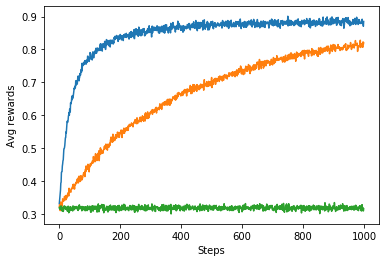

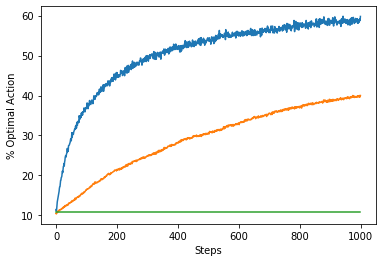

In [64]:
main(2000,1000,10,[0.1, 0.01, 0])